In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [175]:
data = np.loadtxt('log_pot_sample.csv', delimiter=',', dtype=int, usecols=0)    

In [176]:
unique_data = np.unique(data)
xdata = np.linspace(0,len(unique_data)-1, num = len(unique_data))
ydata = np.copy(unique_data)

scale = .85
xdata = xdata * scale + 20

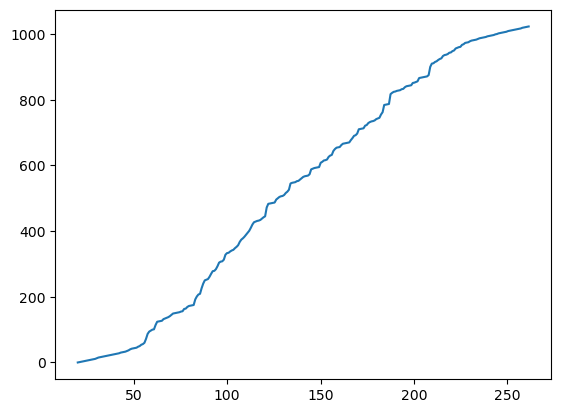

In [178]:
fig, ax = plt.subplots()
ax.plot(xdata, ydata)

In [164]:
def sigmoid(x, L , x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

In [165]:
p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='lm')

In [166]:
print(popt)

[ 1.36136089e+03  1.25629112e+02  1.77660766e-02 -2.14803358e+02]


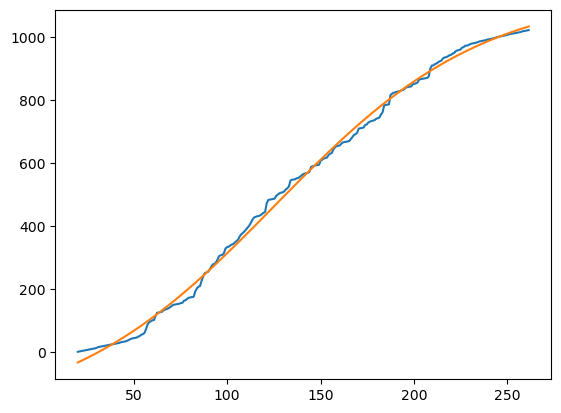

In [167]:
y_fit = np.zeros(len(xdata))
y_fit = sigmoid(xdata, popt[0], popt[1], popt[2], popt[3])

fig, ax = plt.subplots()
ax.plot(xdata, ydata)
ax.plot(xdata, y_fit)

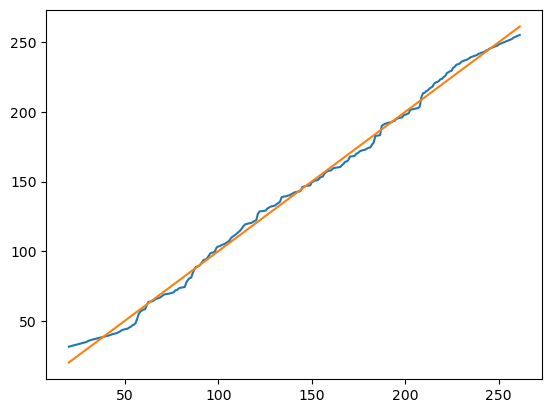

In [168]:
x_ret = ((np.log(popt[0]/(ydata - popt[3])-1)) / -popt[2]) + popt[1]

fig, ax = plt.subplots()
ax.plot(xdata, x_ret)
ax.plot(xdata, xdata)

In [169]:
min(x_ret)

31.359773913518183

In [170]:
max(x_ret)

255.33623831703648